In [1]:
import numpy as np
import sympy as sp
import scipy as scp
import math
import matplotlib.pyplot as plt
from IPython.display import display, Math

### Trigonometry


#### 1. Introduction to Random Numbers 

##### 1.1 Uniform distribution

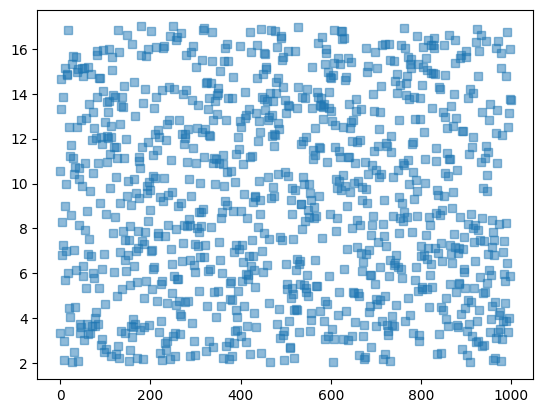

In [2]:
nums = np.random.rand(1000)

# Set parameters for the numbers' range
minval = 2
maxval = 17

# This creates numbers from 2 to 17
nums = nums*(maxval-minval) + minval

plt.plot(nums, 's', alpha=0.5)
plt.show()

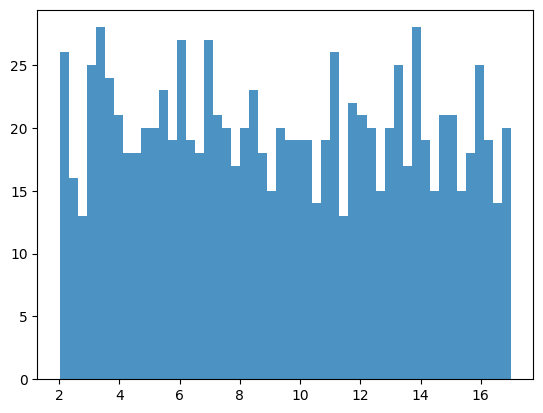

In [3]:
plt.hist(nums, bins=50, alpha=0.8)
plt.show()

##### 1.2 Normal distribution


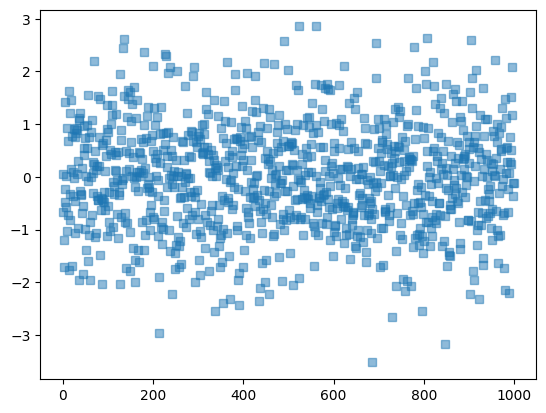

In [4]:
nums = np.random.randn(1000)

plt.plot(nums, 's', alpha=0.5)
plt.show()

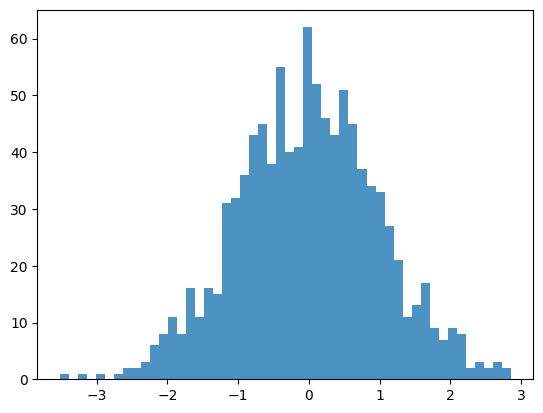

In [5]:
plt.hist(nums, bins=50, alpha=0.8)
plt.show()

##### Exercise

Generate a normal distribution with:

- mean = 15

- standard deviation = 4.3

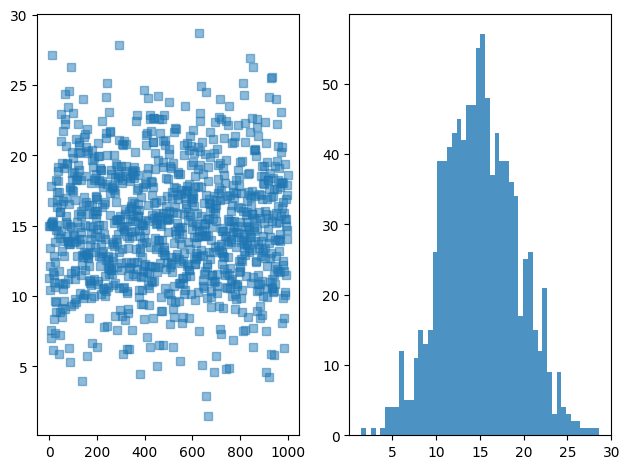

This distribution has a mean of 15.0 and a standard deviation of 4.3


In [6]:
mean_target = 15
std_target = 4.3

nums = np.random.randn(1000)

# Forcing the mean to be 15 and the std to be 4.3
nums = nums - np.mean(nums)
nums = nums/np.std(nums)
# Applying the mean and std parameters
nums = nums*std_target + mean_target

plt.subplot(121)
plt.plot(nums, 's', alpha=0.5)

plt.subplot(122)
plt.hist(nums, bins=50, alpha=0.8)

plt.tight_layout()
plt.show()

print('This distribution has a mean of %s and a standard deviation of %s' %(np.mean(nums), np.std(nums)))

##### Exercise 2 

Plot unit vectors with random phase angles

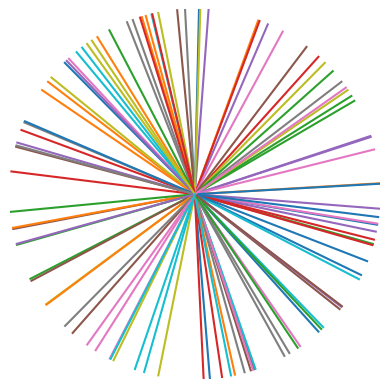

In [7]:
angles = np.random.rand(100)*2*np.pi

for i in angles:
    plt.plot([0, np.cos(i)], [0, np.sin(i)])

plt.axis('square')
plt.axis([-1, 1, -1, 1])
plt.axis('off')

plt.show()

#### 2. Converting between Radians and Degrees

- $\text{rad.} = \frac{360}{2\pi} = 180/\pi$

- $\text{deg.} = \frac{2\pi}{360} = \pi/180$

In [8]:
deg = 180

rad = deg*(np.pi/180)
rad = rad % (2*np.pi)

print('%g degrees is %g radians.' %(deg, rad))

180 degrees is 3.14159 radians.


In [9]:
rad = np.pi

deg = (180*rad/np.pi) % 360

print('%g radians is %g degrees' %(rad, deg))

3.14159 radians is 180 degrees


In [10]:
deg = 180
rad = np.deg2rad(deg) % (2*np.pi)

print('%g degrees is %g radians.' %(deg, rad))

180 degrees is 3.14159 radians.


In [11]:
rad = np.pi
deg = np.rad2deg(rad) % 360

print('%g radians is %g degrees.' %(rad, deg))

3.14159 radians is 180 degrees.


#### 3. The Pythagorean Theorem 

$$a^2 + b^2 = c^2$$

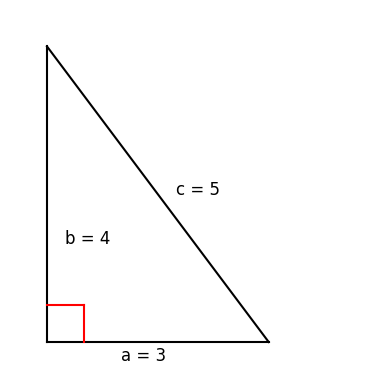

In [12]:
a = 3
b = 4
c = np.sqrt(a**2 + b**2)

plt.plot([0, a], [0, 0], 'k')
plt.plot([0, 0], [0, b], 'k')
plt.plot([0, a], [b, 0], 'k')

plt.plot([0.5, 0.5], [0, 0.5], 'r')
plt.plot([0, 0.5], [0.5, 0.5], 'r')

plt.text(a/3, -0.25, 'a = ' + str(a), fontsize=12)
plt.text(0.25, b/3, 'b = ' + str(b), fontsize=12)
plt.text(a/2+0.25, b/2, 'c = ' + str(int(c)), fontsize=12)

plt.axis('square')

axlim = np.max((a, b)) + 0.5
plt.axis([-0.5, axlim, -0.5, axlim])
plt.axis('off')

plt.show()

##### Exercise

In [13]:
# Define complex number
z = complex(3, 4)

# Compute magnitude (length) of z
magnitude = np.sqrt(z.real**2 + z.imag**2)
magnitude2 = np.abs(z)
print(magnitude, magnitude2)

# Compute arctan (angle of z)
angle = np.arctan2(z.imag, z.real)
angle2 = np.angle(z)
print(angle, angle2)

5.0 5.0
0.9272952180016122 0.9272952180016122


#### 4. Computing and Graphing Sine, Cosine and Tangent

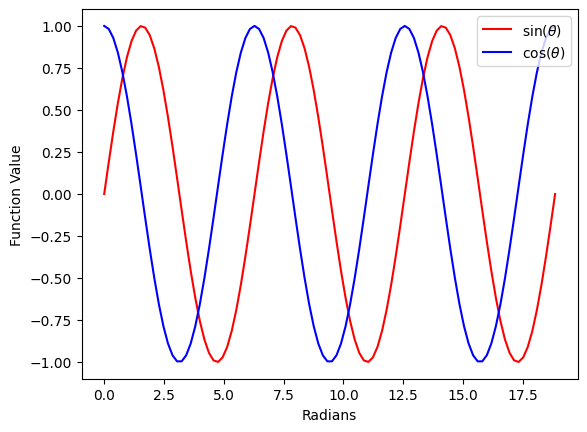

In [14]:
x = np.linspace(0, 6*np.pi, 100)

plt.plot(x, np.sin(x), 'r', label='$\\sin(\\theta)$')
plt.plot(x, np.cos(x), 'b', label='$\\cos(\\theta)$')

plt.legend()
plt.xlabel('Radians')
plt.ylabel('Function Value')

plt.show()

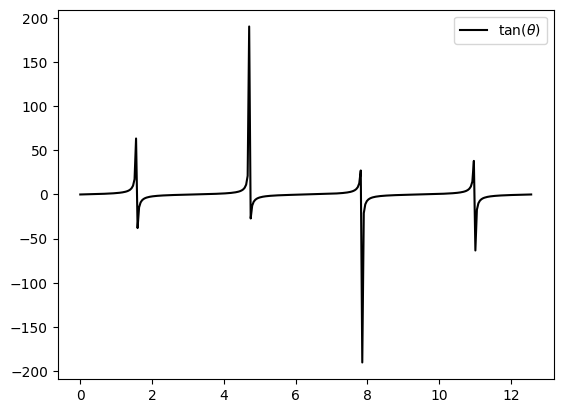

In [15]:
th = np.linspace(0, 4*np.pi, 300)

plt.plot(th, np.tan(th), 'k', label='$\\tan(\\theta)$')

plt.legend()
plt.show()

- Tangent is the ratio of $\frac{sin}{cos}$

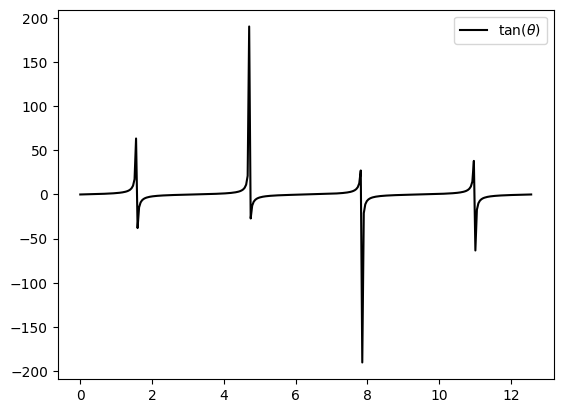

In [16]:
th = np.linspace(0, 4*np.pi, 300)

plt.plot(th, np.sin(th)/np.cos(th), 'k', label='$\\tan(\\theta)$')

plt.legend()
plt.show()

- $\cos(\theta)^{2} + \sin(\theta)^{2} = 1$

In [17]:
thetas = np.linspace(0, 2*np.pi, 10)

print(np.cos(thetas)**2 + np.sin(thetas)**2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##### Exercise 1

$$y_1 = sin(\theta + cos(\theta))$$

$$y_2 = cos(\theta + sin(\theta))$$

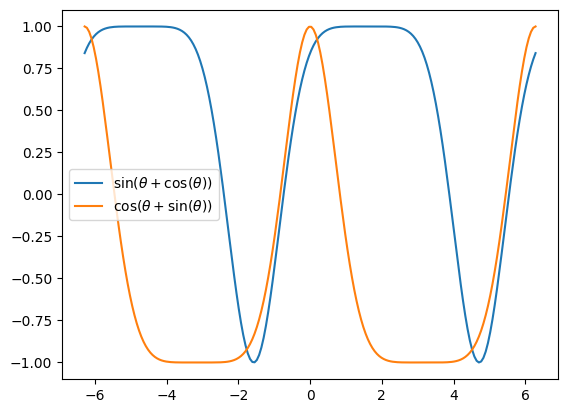

In [18]:
theta = np.linspace(-2*np.pi, 2*np.pi, 200)

y1 = np.sin(theta + np.cos(theta))
y2 = np.cos(theta + np.sin(theta))

plt.plot(theta, y1, label='$\\sin(\\theta + \\cos(\\theta))$')
plt.plot(theta, y2, label='$\\cos(\\theta + \\sin(\\theta))$')

plt.legend()
plt.show()

##### Exercise 2

In [19]:
def plot_angle(angle):

    import sympy as sp
    
    # Check if the input is a numerical value
    if isinstance(angle, (float, int)):  # If the input is a number (not a string)
        # Attempt to convert it to a symbolic expression using sympy's pi constant
        sym_angle = sp.Rational(angle / np.pi).limit_denominator(1000) * sp.pi
    else:
        # If the input is already a symbolic expression, we don't need conversion
        sym_angle = sp.sympify(angle)
        
    theta = float(angle)
    
    # Define linear space
    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    
    # Plot circle
    plt.plot(np.cos(x), np.sin(x), color='gray')
    # Plot cartesian 
    plt.plot([-1.2, 1.2], [0, 0], 'k--', alpha=0.2)
    plt.plot([0, 0], [-1.2, 1.2], 'k--', alpha=0.2)
    
    # Plot the Arc
    plt.plot(np.cos(np.linspace(0, theta)), np.sin(np.linspace(0, theta)), 'k', linewidth=3)
    
    # Plot vector and dot from origin to theta
    plt.plot([0, np.cos(theta)], [0, np.sin(theta)], 'k:', alpha=0.5)
    plt.plot(np.cos(theta), np.sin(theta), 'ko')
    
    # Plot separate cos and sin components
    plt.plot([0, 0], [0, np.sin(theta)], 'r', linewidth=2, label='$\\sin(\\theta)$')
    plt.plot([0, np.cos(theta)], [np.sin(theta), np.sin(theta)], 'r:')
    
    plt.plot([0, np.cos(theta)], [0, 0], 'g', linewidth=2, label='$\\cos(\\theta)$')
    plt.plot([np.cos(theta), np.cos(theta)], [0, np.sin(theta)], 'g:')

    # Customize plot
    plt.axis('square')
    plt.title('$\\theta = %s$' %sp.latex(sym_angle))
    plt.legend()
    
    plt.show()

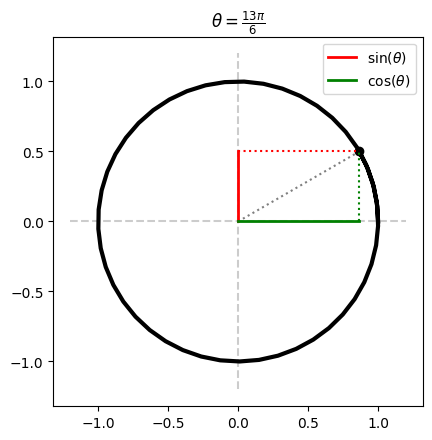

In [20]:
plot_angle(np.pi*13/6)

#### 5. Euler's Formula

$$e^{ik} = cos(k) + isin(k)$$

- Or the modified version that's not limited to the unit circle:

$$me^{ik} = m(cos(k) + isin(k))$$

- Where:

    - $m$ is the magnitude of the vector (distance from origin)
    
    - $k$ is the angle which the vector forms

In [33]:
k = np.pi/6
m = 2.3

eul = m*np.exp(1j*k)
cis = m*(np.cos(k) + 1j*np.sin(k))

print(eul)
print(cis)

(1.991858428704209+1.1499999999999997j)
(1.991858428704209+1.1499999999999997j)


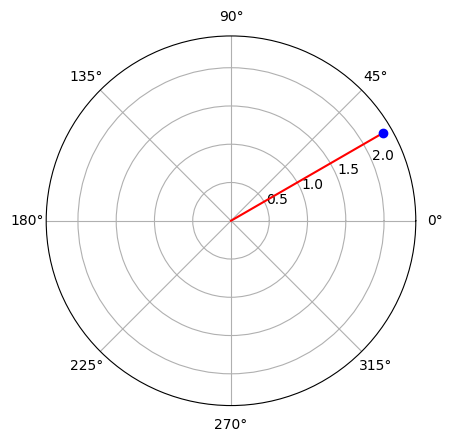

In [35]:
magnitude = np.abs(eul)
angle = np.angle(eul)

plt.polar([0, angle], [0, magnitude], 'r')
plt.polar(k, m, 'bo')

plt.show()

##### Exercise

In [90]:
def euler_from_cos_sin(real, imag):
    # Import modules
    import numpy as np
    import matplotlib.pyplot as plt

    # Avoiding convertion errors for pi with eval()
    real = eval(str(real))
    imag = eval(str(imag))
    
    # Finding magnitude (m) and angle (k)
    magnitude = np.sqrt(real**2 + imag**2)
    angle = np.arctan2(imag, real)

    # Plotting angle on the polar plot
    plt.polar([0, angle], [0, magnitude], 'b', linewidth=2)
    plt.polar(angle, magnitude, 'ro')
    # Customizing plot
    plt.thetagrids([90, 180, 270, 360])
    
    plt.title('$me^{i\\phi}, \\quad m = %g, \\quad \\phi = %g$' %(round(magnitude, 2), round(angle, 2)))

    plt.show()

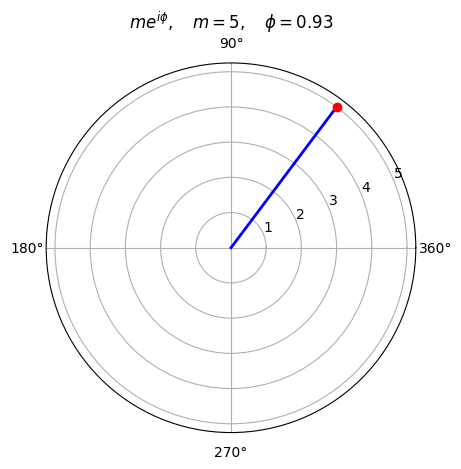

In [91]:
euler_from_cos_sin(3, 4)

##### Exercise 2

Random exploding Euler

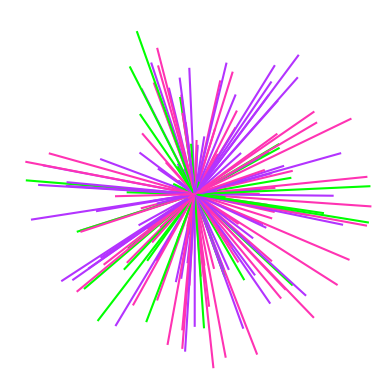

In [136]:
nvect = 200

ks = np.random.rand(nvect)*2*np.pi
ms = np.random.rand(nvect)

for i in range(0, nvect):
    r = np.random.rand()

    if r <= 0.4:
        clr = [1, 0.2, 0.7]
    elif r > 0.4 and r <= 0.8:
        clr = [0.7, 0.2, 1]
    else:
        clr = [0, 1, 0]
    
    plt.polar([0, ks[i]], [0, ms[i]], color=clr)

plt.axis('off')

plt.show()